# 
DonorsChoose Dataset DonorsChoose is a United States-based nonprofit organization that allows individuals to donate directly to public school classroom projects. The organization has been given Charity Navigator’s highest rating every year since 2005. In January 2018, they announced that 1 million projects had been funded.

# 1. Reading Data

In [2]:
import numpy as np
import pandas as pd


In [3]:
project_data = pd.read_csv(r"C:\Users\ASHOK\Downloads\train_data.csv")
resource_data = pd.read_csv(r"C:\Users\ASHOK\Downloads\resources.csv")


In [4]:
project_data.head(1)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0


In [5]:
print(project_data.shape)

(109248, 17)


In [6]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [7]:
resource_data.head(1)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.0


In [8]:
print(resource_data.shape)

(1541272, 4)


# 2.Preprocessing categorical feature:project_grade_category

In [9]:
project_data["project_grade_category"].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

# 
we need to remove all spaces,replace the'-' with '_' and convert the all latters to small

In [10]:
project_data["project_grade_category"] = project_data["project_grade_category"].str.replace(' ','_')
project_data["project_grade_category"] = project_data["project_grade_category"].str.replace('-','_')
project_data["project_grade_category"] = project_data["project_grade_category"].str.lower()
project_data["project_grade_category"].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

# 3.Preprocessing categorical feature:teacher_prefix	

In [11]:
project_data["teacher_prefix"].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [12]:
#check if we have any nan value are present
print(project_data["teacher_prefix"].isnull().values.any())
print("number of num values",project_data["teacher_prefix"].isnull().values.sum())



True
number of num values 3


In [13]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
project_data["teacher_prefix"].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [14]:
project_data["teacher_prefix"] = project_data["teacher_prefix"].str.replace('.','')
project_data["teacher_prefix"] = project_data["teacher_prefix"].str.replace('_','')
project_data["teacher_prefix"] = project_data["teacher_prefix"].str.lower()
project_data["teacher_prefix"].value_counts()

<ipython-input-14-48bbaab66f58>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  project_data["teacher_prefix"] = project_data["teacher_prefix"].str.replace('.','')


mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# 4.preprocessing categorical feature:project_subject_categories

In [15]:
project_data["project_subject_categories"].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

# 
same process we did in project_subject_categories

In [16]:
project_data["project_subject_categories"] = project_data["project_subject_categories"].str.replace(' ','')
project_data["project_subject_categories"] = project_data["project_subject_categories"].str.replace('&','_')
project_data["project_subject_categories"] = project_data["project_subject_categories"].str.replace(',','_')
project_data["project_subject_categories"] = project_data["project_subject_categories"].str.lower()
project_data["project_subject_categories"].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_thearts                            5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_thearts          1757
math_science_music_thearts               1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

# 5.preprocessing categorical feature:project_subject_subcategories

In [17]:
project_data['project_subject_subcategories'].value_counts()

Literacy                                     9486
Literacy, Mathematics                        8325
Literature & Writing, Mathematics            5923
Literacy, Literature & Writing               5571
Mathematics                                  5379
                                             ... 
Community Service, Financial Literacy           1
Economics, Music                                1
Economics, Other                                1
Parent Involvement, Warmth, Care & Hunger       1
Extracurricular, Financial Literacy             1
Name: project_subject_subcategories, Length: 401, dtype: int64

In [18]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

literacy                                9486
literacy_mathematics                    8325
literature_writing_mathematics          5923
literacy_literature_writing             5571
mathematics                             5379
                                        ... 
economics_other                            1
esl_teamsports                             1
history_geography_warmth_care_hunger       1
gym_fitness_socialsciences                 1
parentinvolvement_warmth_care_hunger       1
Name: project_subject_subcategories, Length: 401, dtype: int64

# 6.Preprocessing categorical feature:school_state

In [19]:
#project_data["school_state"] = project_data["school_state"].str.lower()
project_data["school_state"].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

# 
convert all of them into small latter

In [20]:
project_data["school_state"] = project_data["school_state"].str.lower()
project_data["school_state"].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

# 7.Preprocessing categorical feature: project_title

In [21]:
import re

def decontracted(phrase): 
    phrase = re.sub(r"won't", "will not", phrase)  # specific
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    phrase = re.sub(r"n\'t", "not", phrase) # general
    phrase = re.sub(r"\'re", "are", phrase)
    phrase = re.sub(r"\'s", "is", phrase)
    phrase = re.sub(r"\'d", "would", phrase)
    phrase = re.sub(r"\'ll", "will", phrase)
    phrase = re.sub(r"\'t", "not", phrase)
    phrase = re.sub(r"\'ve", "have", phrase)
    phrase = re.sub(r"\'am", "am", phrase)
    return phrase
    
    
    

In [22]:
# we are removing the words from stop words list: 'no', 'not'.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [23]:
project_data["project_title"].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [24]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [25]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [26]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:03<00:00, 33406.83it/s]


In [27]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


In [28]:
preprocessed_titles

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners',
 'interactive math tools',
 'flexible seating mrs jarvis terrific third graders',
 'chromebooks special education reading program',
 'itis 21st century',
 'targeting success class',
 'love reading pure pleasure',
 'reading changes lives',
 'elevating academics parent rapports technology',
 'building life science experiences',
 'everyone deserves heard',
 'tablets show us world',
 'making recess active',
 'making great leapis leapfrog',
 'technology teaches tomorrowis talents today',
 'test time',
 'wiggling way success',
 'magic carpet ride library',
 'sitting standing classroom',
 'books budding intellectuals',
 'instrumental power conquering steam',
 'e challenges science technology engineering art math',
 'math masters',
 'techy teaching',
 '4th grade french immersion class ipads',
 'hands language literacy',
 'basic classr

# 8.Preprocessing categorical feature: essay

In [29]:
# merge
project_data["essay"] = project_data["project_essay_1"].map(str)+\
                      project_data["project_essay_2"].map(str)+\
                      project_data["project_essay_3"].map(str)+\
                      project_data["project_essay_4"].map(str)

In [30]:
print("printing some random essay")
print(9,project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(140, project_data['essay'].values[140])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [31]:
preprocessed_essay = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [01:15<00:00, 1444.34it/s]


In [32]:
preprocessed_essay

['students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learneris strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvdis players students able continue mastery english language even no one home able assist families students within level 1 proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch videos help child develop early reading skills parents not access dvd player opportunity check 

In [33]:
print("printing some random essay")
print(9,project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(140, project_data['essay'].values[140])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

# Preprocessing numerical value: price

In [34]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [35]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

# Apply standardscaler

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [38]:
project_data['std_price'].head()

0   -0.390533
1    0.002396
2    0.595191
3   -0.177469
4   -0.626236
Name: std_price, dtype: float64

# Apply minmaxscaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [40]:
project_data['nrm_price'].head()

0    0.015397
1    0.029839
2    0.051628
3    0.023228
4    0.006733
Name: nrm_price, dtype: float64

In [44]:
df=pd.DataFrame(project_data,columns=['project_grade_category','school_state','teacher_prefix','teacher_number_of_previously_posted_projects','project_subject_subcategories','project_subject_categories','project_is_approved','preprocessed_essay','price'])


In [45]:
df.head(2)

,project_grade_category,school_state,teacher_prefix,teacher_number_of_previously_posted_projects,project_subject_subcategories,project_subject_categories,project_is_approved,preprocessed_essay,price
0,grades_prek_2,in,mrs,0,esl_literacy,literacy_language,0,NaN,154.6
1,grades_6_8,fl,mr,7,civics_government_teamsports,history_civics_health_sports,1,NaN,299.0


In [46]:
y = df['project_is_approved'].values
X = df.drop(['project_is_approved'], axis=1)
X.head(1)

,project_grade_category,school_state,teacher_prefix,teacher_number_of_previously_posted_projects,project_subject_subcategories,project_subject_categories,preprocessed_essay,price
0,grades_prek_2,in,mrs,0,esl_literacy,literacy_language,NaN,154.6


In [47]:
# how many raws and columns are present
df.shape

(109248, 9)

In [48]:
# How many data ppoints for each class are present
# Balanced Vs Imbalanced
df["project_is_approved"].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [49]:
y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")


Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


([<matplotlib.patches.Wedge at 0x27c2211d580>,
 [Text(-0.5037475373207753, -0.977874439099036, 'project_is_approved'),
  Text(0.5037475373207754, 0.9778744390990359, ' project_is_not_approved')],
 [Text(-0.2747713839931501, -0.5333860576903833, '84.858'),
  Text(0.2747713839931502, 0.5333860576903832, '15.142')])

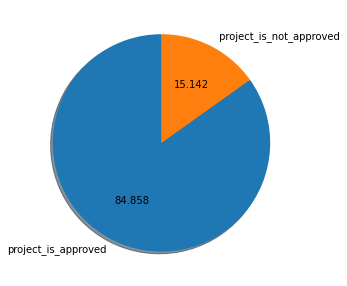

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.pie(df["project_is_approved"].value_counts(),startangle = 90, autopct = '%.3f', labels = ['project_is_approved', ' project_is_not_approved'], shadow = True)


#   Splitting data into Train and cross validation(or test): Stratified Sampling

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, stratify = y)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.30, stratify = y_train)

In [52]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(53531, 8) (53531,)
(22942, 8) (22942,)
(32775, 8) (32775,)


# Bag of word representation

In [55]:
ex = ["classroom students should take break",
"low income homes students receive free breakfast",
"students will receive low grades"]
vectorizer = CountVectorizer()
vectorizer.fit(ex)
print(vectorizer.transform(ex).toarray())
print(vectorizer.get_feature_names())

[[1 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 1]]
['break', 'breakfast', 'classroom', 'free', 'grades', 'homes', 'income', 'low', 'receive', 'should', 'students', 'take', 'will']


# encoding categorical feature: school_state

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 51) (53531,)
(22942, 51) (22942,)
(32775, 51) (32775,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# encoding categorical feature: project_grade_category

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(X_cv_project_grade_category_ohe.shape, y_cv.shape)
print(X_test_project_grade_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 4) (53531,)
(22942, 4) (22942,)
(32775, 4) (32775,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# encoding categorical feature: teacher_prefix

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 5) (53531,)
(22942, 5) (22942,)
(32775, 5) (32775,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


# encoding categorical feature: project_subject_categories

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_subject_categories_ohe = vectorizer.transform(X_train['project_subject_categories'].values)
X_cv_project_subject_categories_ohe = vectorizer.transform(X_cv['project_subject_categories'].values)
X_test_project_subject_categories_ohe = vectorizer.transform(X_test['project_subject_categories'].values)

print("After vectorizations")
print(X_train_project_subject_categories_ohe.shape, y_train.shape)
print(X_cv_project_subject_categories_ohe.shape, y_cv.shape)
print(X_test_project_subject_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 49) (53531,)
(22942, 49) (22942,)
(32775, 49) (32775,)
['appliedlearning', 'appliedlearning_health_sports', 'appliedlearning_history_civics', 'appliedlearning_literacy_language', 'appliedlearning_math_science', 'appliedlearning_music_thearts', 'appliedlearning_specialneeds', 'appliedlearning_warmth_care_hunger', 'health_sports', 'health_sports_appliedlearning', 'health_sports_history_civics', 'health_sports_literacy_language', 'health_sports_math_science', 'health_sports_music_thearts', 'health_sports_specialneeds', 'health_sports_warmth_care_hunger', 'history_civics', 'history_civics_appliedlearning', 'history_civics_health_sports', 'history_civics_literacy_language', 'history_civics_math_science', 'history_civics_music_thearts', 'history_civics_specialneeds', 'literacy_language', 'literacy_language_appliedlearning', 'literacy_language_health_sports', 'literacy_language_history_civics', 'literacy_language_math_science', 'literacy_language_music_thearts', '

# encoding categorical feature: project_subject_subcategories

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_subject_subcategories_ohe = vectorizer.transform(X_train['project_subject_subcategories'].values)
X_cv_project_subject_subcategories_ohe = vectorizer.transform(X_cv['project_subject_subcategories'].values)
X_test_project_subject_subcategories_ohe = vectorizer.transform(X_test['project_subject_subcategories'].values)

print("After vectorizations")
print(X_train_project_subject_subcategories_ohe.shape, y_train.shape)
print(X_cv_project_subject_subcategories_ohe.shape, y_cv.shape)
print(X_test_project_subject_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 378) (53531,)
(22942, 378) (22942,)
(32775, 378) (32775,)
['appliedsciences', 'appliedsciences_charactereducation', 'appliedsciences_civics_government', 'appliedsciences_college_careerprep', 'appliedsciences_communityservice', 'appliedsciences_earlydevelopment', 'appliedsciences_economics', 'appliedsciences_environmentalscience', 'appliedsciences_esl', 'appliedsciences_extracurricular', 'appliedsciences_financialliteracy', 'appliedsciences_foreignlanguages', 'appliedsciences_gym_fitness', 'appliedsciences_health_lifescience', 'appliedsciences_health_wellness', 'appliedsciences_history_geography', 'appliedsciences_literacy', 'appliedsciences_literature_writing', 'appliedsciences_mathematics', 'appliedsciences_music', 'appliedsciences_nutritioneducation', 'appliedsciences_other', 'appliedsciences_parentinvolvement', 'appliedsciences_performingarts', 'appliedsciences_socialsciences', 'appliedsciences_specialneeds', 'appliedsciences_teamsports', 'appliedscience

# Encoding numerical features: price

In [61]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm=normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(-1,1))
X_cv_price_norm=normalizer.transform(X_cv['price'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_price_norm.shape,y_train.shape)
print("test feature --",X_test_price_norm.shape,y_test.shape)
print("cv feature --",X_cv_price_norm.shape,y_cv.shape)



 after encoding using normalizer the size of :
 train feature -- (53531, 1) (53531,)
test feature -- (32775, 1) (32775,)
cv feature -- (22942, 1) (22942,)


# Encoding numerical features: teacher_number_of_previously_posted_projects

In [62]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_teacher_number_of_previously_posted_projects_norm.shape,y_train.shape)
print("test feature --",X_test_teacher_number_of_previously_posted_projects_norm.shape,y_test.shape)
print("cv feature --",X_cv_teacher_number_of_previously_posted_projects_norm.shape,y_cv.shape)


 after encoding using normalizer the size of :
 train feature -- (53531, 1) (53531,)
test feature -- (32775, 1) (32775,)
cv feature -- (22942, 1) (22942,)


In [63]:
from scipy.sparse import hstack
X_train_ohe = hstack(( X_train_school_state_ohe,X_train_project_grade_category_ohe,X_train_teacher_prefix_ohe,X_train_project_subject_categories_ohe,X_train_project_subject_subcategories_ohe,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_ohe = hstack((X_test_school_state_ohe,X_test_project_grade_category_ohe,X_test_teacher_prefix_ohe,X_test_project_subject_categories_ohe,X_test_project_subject_subcategories_ohe,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()
#X_cv_ohe = hstack((X_cv_school_state_ohe,X_cv_project_grade_category_ohe,X_cv_teacher_prefix_ohe,X_cv_project_subject_categories_ohe,X_cv_project_subject_subcategories_ohe,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cv_ohe = hstack((X_cv_school_state_ohe,X_cv_project_grade_category_ohe,X_cv_teacher_prefix_ohe,X_cv_project_subject_categories_ohe,X_cv_project_subject_subcategories_ohe,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_ohe.shape, y_train.shape)
print(X_test_ohe.shape, y_test.shape)
print(X_cv_ohe.shape, y_cv.shape)




(53531, 489) (53531,)
(32775, 489) (32775,)
(22942, 489) (22942,)


# TFIDF Representation

In [64]:
# Example:

#S1 - He asked why the government should be allowed to set up a committee .
 
#S2 - The committee will work according to the rules defined by the previous committee.

#Term frequency(TF):

#          tf(committee) = 1/13  =  0.07692  (from sentence 1)
#          tf(committee) = 2/13 = 0.15384    (from sentence 2)

#Inverse document frequency(IDF):
      

#         idf(committee) = ln((1+2)/(1+2)) + 1 =  1


  

 

# TFIDF Categorica:school_state

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()                              #min_df=10,ngram_range=(1,4), max_features=5000
vectorizer.fit(X_train['school_state'].values)
school_state_feature_TF=vectorizer.get_feature_names()
X_train_school_state_TF=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_TF=vectorizer.transform(X_test['school_state'].values)
X_cv_school_state_TF=vectorizer.transform(X_cv['school_state'].values)

print(" train feature --",X_train_school_state_TF.shape,y_train.shape)
print("test feature --",X_test_school_state_TF.shape,y_test.shape)
print("cv feature --",X_cv_school_state_TF.shape,y_cv.shape)

C:\Users\ASHOK\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 train feature -- (53531, 51) (53531,)
test feature -- (32775, 51) (32775,)
cv feature -- (22942, 51) (22942,)


# TFIDF Categorica:teacher_prefix

In [66]:
vectorizer = TfidfVectorizer()                               #min_df=10,ngram_range=(1,4), max_features=5000
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_TF=vectorizer.get_feature_names()
X_train_teacher_prefix_TF=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_TF=vectorizer.transform(X_test['teacher_prefix'].values)
X_cv_teacher_prefix_TF=vectorizer.transform(X_cv['teacher_prefix'].values)

print(" train feature --",X_train_teacher_prefix_TF.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_TF.shape,y_test.shape)
print("cv feature --",X_cv_teacher_prefix_TF.shape,y_cv.shape)

 train feature -- (53531, 5) (53531,)
test feature -- (32775, 5) (32775,)
cv feature -- (22942, 5) (22942,)


# TFIDF Categorica:project_grade_category

In [67]:
vectorizer = TfidfVectorizer()               #min_df=10,ngram_range=(1,4), max_features=5000
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_TF=vectorizer.get_feature_names()
X_train_project_grade_category_TF=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_TF=vectorizer.transform(X_test['project_grade_category'].values)
X_cv_project_grade_category_TF=vectorizer.transform(X_cv['project_grade_category'].values)

print(" train feature --",X_train_project_grade_category_TF.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_TF.shape,y_test.shape)
print("cv feature --",X_cv_project_grade_category_TF.shape,y_cv.shape)

 train feature -- (53531, 4) (53531,)
test feature -- (32775, 4) (32775,)
cv feature -- (22942, 4) (22942,)


# TFIDF Categorical:project_subject_subcategories

In [68]:
vectorizer = TfidfVectorizer()                  #min_df=10,ngram_range=(1,4), max_features=5000
vectorizer.fit(X_train['project_subject_subcategories'].values)
project_subject_subcategories_feature_TF=vectorizer.get_feature_names()
X_train_project_subject_subcategories_TF=vectorizer.transform(X_train['project_subject_subcategories'].values)
X_test_project_subject_subcategories_TF=vectorizer.transform(X_test['project_subject_subcategories'].values)
X_cv_project_subject_subcategories_TF=vectorizer.transform(X_cv['project_subject_subcategories'].values)

print(" train feature --",X_train_project_subject_subcategories_TF.shape,y_train.shape)
print("test feature --",X_test_project_subject_subcategories_TF.shape,y_test.shape)
print("cv feature --",X_cv_project_subject_subcategories_TF.shape,y_cv.shape)

 train feature -- (53531, 378) (53531,)
test feature -- (32775, 378) (32775,)
cv feature -- (22942, 378) (22942,)


# TFIDF:project_subject_categories

In [69]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_subject_categories'].values)
project_subject_categories_feature_TF=vectorizer.get_feature_names()
X_train_project_subject_categories_TF=vectorizer.transform(X_train['project_subject_categories'].values)
X_test_project_subject_categories_TF=vectorizer.transform(X_test['project_subject_categories'].values)
X_cv_project_subject_categories_TF=vectorizer.transform(X_cv['project_subject_categories'].values)

print(" train feature --",X_train_project_subject_categories_TF.shape,y_train.shape)
print("test feature --",X_test_project_subject_categories_TF.shape,y_test.shape)
print("cv feature --",X_cv_project_subject_categories_TF.shape,y_cv.shape)

 train feature -- (53531, 49) (53531,)
test feature -- (32775, 49) (32775,)
cv feature -- (22942, 49) (22942,)


# TFIDF Numerical:price

In [70]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm=normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(-1,1))
X_cv_price_norm=normalizer.transform(X_cv['price'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_price_norm.shape,y_train.shape)
print("test feature --",X_test_price_norm.shape,y_test.shape)
print("cv feature --",X_cv_price_norm.shape,y_cv.shape)


 after encoding using normalizer the size of :
 train feature -- (53531, 1) (53531,)
test feature -- (32775, 1) (32775,)
cv feature -- (22942, 1) (22942,)


# TFIDF Numerical:teacher_number_of_previously_posted_projects

In [71]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_teacher_number_of_previously_posted_projects_norm.shape,y_train.shape)
print("test feature --",X_test_teacher_number_of_previously_posted_projects_norm.shape,y_test.shape)
print("cv feature --",X_cv_teacher_number_of_previously_posted_projects_norm.shape,y_cv.shape)


 after encoding using normalizer the size of :
 train feature -- (53531, 1) (53531,)
test feature -- (32775, 1) (32775,)
cv feature -- (22942, 1) (22942,)


In [72]:
from scipy.sparse import hstack
X_train_TFIDF = hstack((X_train_teacher_prefix_TF, X_train_school_state_TF, X_train_project_grade_category_TF,X_train_project_subject_subcategories_TF,X_train_project_subject_categories_TF, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_TFIDF = hstack((X_test_teacher_prefix_TF, X_test_school_state_TF, X_test_project_grade_category_TF,X_test_project_subject_subcategories_TF,X_test_project_subject_categories_TF, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cv_TFIDF = hstack((X_cv_teacher_prefix_TF, X_cv_school_state_TF, X_cv_project_grade_category_TF,X_cv_project_subject_subcategories_TF,X_cv_project_subject_categories_TF, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()


print(X_train_TFIDF.shape, y_train.shape)
print(X_cv_TFIDF.shape, y_cv.shape)
print(X_test_TFIDF.shape, y_test.shape)

(53531, 489) (53531,)
(22942, 489) (22942,)
(32775, 489) (32775,)


# Response Encoding

In [168]:
from collections import Counter
def response_encoding_fit(X_train_feature_total, X_train_feature_0, X_train_feature_1):
    feature_counter_total = Counter()
    feature_counter_total.update(i for i in X_train_feature_total)
    
    feature_counter_0 = Counter()  # Create a dict variable to act as a Counter
    feature_counter_0.update(i for i in X_train_feature_0)   # adding values to the Counter from x_train_feature_0
    for i in feature_counter_total:         # i is each key (e.g. 'ca', 'fl' etc for school_state)
        if i not in feature_counter_0:        # If a key is not there in feature_counter_0
            feature_counter_0[i] = 0 
            # Similary do the same for x_train_feature_1
    feature_counter_1 = Counter()
    feature_counter_1.update(i for i in X_train_feature_1)# set the value of that key be 0 in dict feature_counter_0
    for i in feature_counter_total:
            if i not in feature_counter_1:
                feature_counter_1[i] = 0
      
    return feature_counter_total, feature_counter_0, feature_counter_1
    

In [169]:
def response_encoding_transform(X_feature_train, feature_counter_total, feature_counter_0, feature_counter_1):
  feature_proba_arr_0 = []
  feature_proba_arr_1 = []
  
  for i in X_feature_train:
    # Now loop over each feature-name e.g. 'ca', 'fl' etc for school_state
    if i in feature_counter_total.keys(): # if the specific unique feature-names exist in train data x_feature_train
      # .get(i) will give me the value of the key, i.e. the number count for each key (which represents the feature-name)
      proba_0 = feature_counter_0.get(i)/feature_counter_total.get(i) 
      proba_1 = feature_counter_1.get(i)/feature_counter_total.get(i)      
      
      feature_proba_arr_0.append(proba_0)
      feature_proba_arr_1.append(proba_1)
    else:
      feature_proba_arr_0.append(0.5)
      feature_proba_arr_1.append(0.5)      
  # Have to convert to array so I can invoke reshape() on these
  feature_proba_arr_0 = np.array(feature_proba_arr_0)
  feature_proba_arr_1 = np.array(feature_proba_arr_1)
    
  return feature_proba_arr_0.reshape(-1, 1), feature_proba_arr_1.reshape(-1, 1)

In [170]:
import pandas as pd
df_cat_train_before_response_coding = pd.DataFrame(y_train, columns=['project_is_approved'])
df_cat_train_before_response_coding['school_state'] = X_train['school_state'].values
df_cat_train_before_response_coding['teacher_prefix'] = X_train['teacher_prefix'].values
df_cat_train_before_response_coding['project_grade_category'] = X_train['project_grade_category'].values
df_cat_train_before_response_coding['project_subject_categories'] = X_train['project_subject_categories'].values
df_cat_train_before_response_coding['project_subject_subcategories'] = X_train['project_subject_subcategories'].values
df_cat_train_before_response_coding.head(2)

,project_is_approved,school_state,teacher_prefix,project_grade_category,project_subject_categories,project_subject_subcategories
0,1,mo,ms,grades_prek_2,math_science_literacy_language,appliedsciences_literacy
1,1,tx,mrs,grades_3_5,health_sports,gym_fitness


# Response Encoding school_state 

In [171]:
X_train_feature_total = df_cat_train_before_response_coding['school_state']
X_train_feature_0 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==0]['school_state']
X_train_feature_1 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==1]['school_state']

school_state_counter_total, school_state_counter_0, school_state_counter_1 = response_encoding_fit(X_train_feature_total, X_train_feature_0, X_train_feature_1 )

X_train_school_state_response_proba_0, X_train_school_state_response_proba_1 = response_encoding_transform(X_train['school_state'], school_state_counter_total, school_state_counter_0, school_state_counter_1)

X_test_school_state_response_proba_0, X_test_school_state_response_proba_1 = response_encoding_transform(X_test['school_state'], school_state_counter_total, school_state_counter_0, school_state_counter_1)

X_cv_school_state_response_proba_0, X_cv_school_state_response_proba_1 = response_encoding_transform(X_cv['school_state'], school_state_counter_total, school_state_counter_0, school_state_counter_1)


print(np.mean(X_train_school_state_response_proba_0, axis=0))
print(X_train_school_state_response_proba_0.shape, y_train.shape)
print(X_test_school_state_response_proba_0.shape, y_test.shape)
print(X_cv_school_state_response_proba_0.shape, y_test.shape)

[0.1514076]
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (32775,)


# Response Encoding: teacher_prefix 

In [172]:
X_train_feature_total = df_cat_train_before_response_coding['teacher_prefix']
X_train_feature_0 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==0]['teacher_prefix']
X_train_feature_1 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==1]['teacher_prefix']

teacher_prefix_counter_total, teacher_prefix_counter_0, teacher_prefix_counter_1 = response_encoding_fit(X_train_feature_total, X_train_feature_0, X_train_feature_1 )

X_train_teacher_prefix_response_proba_0, X_train_teacher_prefix_response_proba_1 = response_encoding_transform(X_train['teacher_prefix'], teacher_prefix_counter_total, teacher_prefix_counter_0, teacher_prefix_counter_1)

X_test_teacher_prefix_response_proba_0, X_test_teacher_prefix_response_proba_1 = response_encoding_transform(X_test['teacher_prefix'], teacher_prefix_counter_total, teacher_prefix_counter_0, teacher_prefix_counter_1)

X_cv_teacher_prefix_response_proba_0, X_cv_teacher_prefix_response_proba_1 = response_encoding_transform(X_cv['teacher_prefix'], teacher_prefix_counter_total, teacher_prefix_counter_0, teacher_prefix_counter_1)


print(np.mean(X_train_teacher_prefix_response_proba_0, axis=0))
print(X_train_teacher_prefix_response_proba_0.shape, y_train.shape)
print(X_test_teacher_prefix_response_proba_0.shape, y_test.shape)
print(X_cv_teacher_prefix_response_proba_0.shape, y_cv.shape)

[0.1514076]
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (22942,)


# Response Encoding: project_grade_category

In [173]:
X_train_feature_total = df_cat_train_before_response_coding['project_grade_category']
X_train_feature_0 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==0]['project_grade_category']
X_train_feature_1 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==1]['project_grade_category']

project_grade_category_counter_total, project_grade_category_counter_0, project_grade_category_counter_1 = response_encoding_fit(X_train_feature_total, X_train_feature_0, X_train_feature_1 )

X_train_project_grade_category_response_proba_0, X_train_project_grade_category_response_proba_1 = response_encoding_transform(X_train['project_grade_category'], project_grade_category_counter_total, project_grade_category_counter_0, project_grade_category_counter_1)

X_test_project_grade_category_response_proba_0, X_test_project_grade_category_response_proba_1 = response_encoding_transform(X_test['project_grade_category'], project_grade_category_counter_total, project_grade_category_counter_0, project_grade_category_counter_1)

X_cv_project_grade_category_response_proba_0, X_cv_project_grade_category_response_proba_1 = response_encoding_transform(X_cv['project_grade_category'], project_grade_category_counter_total, project_grade_category_counter_0, project_grade_category_counter_1)

print(np.mean(X_train_project_grade_category_response_proba_0, axis=0))
print(X_train_project_grade_category_response_proba_0.shape, y_train.shape)
print(X_test_project_grade_category_response_proba_0.shape, y_test.shape)
print(X_cv_project_grade_category_response_proba_0.shape, y_cv.shape)

[0.1514076]
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (22942,)


# Response Encoding: project_subject_categories

In [174]:
X_train_feature_total = df_cat_train_before_response_coding['project_subject_categories']
X_train_feature_0 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==0]['project_subject_categories']
X_train_feature_1 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==1]['project_subject_categories']

project_subject_categories_counter_total, project_subject_categories_counter_0, project_subject_categories_counter_1 = response_encoding_fit(X_train_feature_total, X_train_feature_0, X_train_feature_1 )

X_train_project_subject_categories_response_proba_0, X_train_project_subject_categories_response_proba_1 = response_encoding_transform(X_train['project_subject_categories'], project_subject_categories_counter_total, project_subject_categories_counter_0, project_subject_categories_counter_1)

X_test_project_subject_categories_response_proba_0, X_test_project_subject_categories_response_proba_1 = response_encoding_transform(X_test['project_subject_categories'], project_subject_categories_counter_total,project_subject_categories_counter_0, project_subject_categories_counter_1)

X_cv_project_subject_categories_response_proba_0, X_cv_project_subject_categories_response_proba_1 = response_encoding_transform(X_cv['project_subject_categories'], project_subject_categories_counter_total, project_subject_categories_counter_0, project_subject_categories_counter_1)

print(np.mean(X_train_project_subject_categories_response_proba_0, axis=0))
print(X_train_project_subject_categories_response_proba_0.shape, y_train.shape)
print(X_test_project_subject_categories_response_proba_0.shape, y_test.shape)
print(X_cv_project_subject_categories_response_proba_0.shape, y_cv.shape)

[0.1514076]
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (22942,)


#  Response Encoding: project_subject_subcategories

In [175]:
X_train_feature_total = df_cat_train_before_response_coding['project_subject_subcategories']
X_train_feature_0 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==0]['project_subject_subcategories']
X_train_feature_1 = df_cat_train_before_response_coding.loc[df_cat_train_before_response_coding['project_is_approved']==1]['project_subject_subcategories']

project_subject_subcategories_counter_total, project_subject_subcategories_counter_0, project_subject_subcategories_counter_1 = response_encoding_fit(X_train_feature_total, X_train_feature_0, X_train_feature_1 )

X_train_project_subject_subcategories_response_proba_0, X_train_project_subject_subcategories_response_proba_1 = response_encoding_transform(X_train['project_subject_subcategories'], project_subject_subcategories_counter_total, project_subject_subcategories_counter_0, project_subject_subcategories_counter_1)

X_test_project_subject_subcategories_response_proba_0, X_test_project_subject_subcategories_response_proba_1 = response_encoding_transform(X_test['project_subject_subcategories'], project_subject_subcategories_counter_total,project_subject_subcategories_counter_0, project_subject_subcategories_counter_1)

X_cv_project_subject_subcategories_response_proba_0, X_cv_project_subject_subcategories_response_proba_1 = response_encoding_transform(X_cv['project_subject_subcategories'], project_subject_subcategories_counter_total, project_subject_subcategories_counter_0, project_subject_subcategories_counter_1)

print(np.mean(X_train_project_subject_subcategories_response_proba_0, axis=0))
print(X_train_project_subject_subcategories_response_proba_0.shape, y_train.shape)
print(X_test_project_subject_subcategories_response_proba_0.shape, y_test.shape)
print(X_cv_project_subject_subcategories_response_proba_0.shape, y_cv.shape)

[0.1514076]
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (22942,)


# Encoding numerical features:price

In [176]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1, 1))

X_train_normalized_price = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_normalized_price = normalizer.transform(X_test['price'].values.reshape(-1,1))
X_cv_normalized_price = normalizer.transform(X_cv['price'].values.reshape(-1,1))

print('After Normalizing on price column checking the shapes ')
# print('X_train_normalized_price ', X_train_normalized_price)
print(X_train_normalized_price.shape, y_train.shape)
print(X_test_normalized_price.shape, y_test.shape)
print(X_cv_normalized_price.shape, y_cv.shape)

After Normalizing on price column checking the shapes 
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (22942,)


# Encoding numerical features:teacher_number_of_previously_posted_projects

In [177]:
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

X_train_normalized_teacher_number_of_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_normalized_teacher_number_of_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_normalized_teacher_number_of_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print('After Normalizing on teacher_number_of_previously_posted_projects column checking the shapes ')
# print('X_train_normalized_teacher_number_of_previously_posted_projects ', X_train_normalized_teacher_number_of_previously_posted_projects)
print(X_train_normalized_teacher_number_of_previously_posted_projects.shape, y_train.shape)
print(X_test_normalized_teacher_number_of_previously_posted_projects.shape, y_test.shape)
print(X_cv_normalized_teacher_number_of_previously_posted_projects.shape, y_cv.shape)

After Normalizing on teacher_number_of_previously_posted_projects column checking the shapes 
(53531, 1) (53531,)
(32775, 1) (32775,)
(22942, 1) (22942,)


In [178]:
from scipy.sparse import hstack

X_train_Response =np.hstack((X_train_school_state_response_proba_0,X_train_teacher_prefix_response_proba_0,X_train_project_grade_category_response_proba_0,X_train_project_subject_subcategories_response_proba_0,X_train_project_subject_categories_response_proba_0,X_train_normalized_price,X_train_normalized_teacher_number_of_previously_posted_projects))
X_test_Response = np.hstack((X_test_school_state_response_proba_0,X_test_teacher_prefix_response_proba_0,X_test_project_grade_category_response_proba_0,X_test_project_subject_subcategories_response_proba_0,X_test_project_subject_subcategories_response_proba_0,X_test_normalized_price,X_test_normalized_teacher_number_of_previously_posted_projects))
X_cv_Response = np.hstack((X_cv_school_state_response_proba_0,X_cv_teacher_prefix_response_proba_0,X_cv_project_grade_category_response_proba_0,X_cv_project_subject_subcategories_response_proba_0,X_cv_project_subject_categories_response_proba_0,X_cv_normalized_price,X_cv_normalized_teacher_number_of_previously_posted_projects))


print( X_train_Response.shape, y_train.shape)
print( X_test_Response.shape, y_test.shape)
print( X_cv_Response.shape, y_cv.shape)

(53531, 7) (53531,)
(32775, 7) (32775,)
(22942, 7) (22942,)


In [179]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_clf_s1 = XGBClassifier(eval_metric='mlogloss')

params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators':[5, 10, 50, 75, 100, 200]}

grid_search_s1 = GridSearchCV(xgb_clf_s1, params, cv=3, scoring='roc_auc', return_train_score=True)

grid_search_s1.fit(X_train_ohe, y_train)

train_auc= grid_search_s1.cv_results_['mean_train_score']
train_auc_std= grid_search_s1.cv_results_['std_train_score']
cv_auc = grid_search_s1.cv_results_['mean_test_score']
cv_auc_std= grid_search_s1.cv_results_['std_test_score']
bestlearning_rate_1=grid_search_s1.best_params_['learning_rate']
bestn_estimators_1=grid_search_s1.best_params_['n_estimators']
bestScore_1=grid_search_s1.best_score_

C:\Users\ASHOK\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASHOK\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASHOK\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab

In [84]:
results = pd.DataFrame.from_dict(grid_search_s1.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.070409,0.011270,0.011205,0.000602,0.0001,5,"{'learning_rate': 0.0001, 'n_estimators': 5}",0.554876,0.541664,0.543641,0.546727,0.005818,36,0.556407,0.559596,0.558096,0.558033,0.001303
1,0.135950,0.005852,0.012980,0.000339,0.0001,10,"{'learning_rate': 0.0001, 'n_estimators': 10}",0.554876,0.541664,0.543641,0.546727,0.005818,35,0.556407,0.559596,0.558095,0.558033,0.001303
2,0.436489,0.020093,0.016486,0.000237,0.0001,50,"{'learning_rate': 0.0001, 'n_estimators': 50}",0.554777,0.542648,0.543641,0.547022,0.005498,33,0.556544,0.563763,0.558095,0.559467,0.003103
3,0.638103,0.026422,0.020523,0.000270,0.0001,75,"{'learning_rate': 0.0001, 'n_estimators': 75}",0.554968,0.542634,0.543641,0.547081,0.005592,31,0.557439,0.563771,0.558095,0.559768,0.002843
4,0.812160,0.008203,0.025022,0.000921,0.0001,100,"{'learning_rate': 0.0001, 'n_estimators': 100}",0.554984,0.542634,0.543641,0.547086,0.005600,30,0.557635,0.563771,0.558095,0.559834,0.002791
5,1.583785,0.010548,0.039367,0.001726,0.0001,200,"{'learning_rate': 0.0001, 'n_estimators': 200}",0.555491,0.542614,0.543641,0.547249,0.005843,29,0.559212,0.563783,0.558095,0.560363,0.002461
6,0.052253,0.001093,0.010222,0.001289,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.554776,0.542589,0.543642,0.547002,0.005514,34,0.556544,0.563795,0.558095,0.559478,0.003118
7,0.100434,0.005276,0.011300,0.002747,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.554975,0.542588,0.543641,0.547068,0.005608,32,0.557593,0.563795,0.558095,0.559827,0.002813
8,0.404732,0.003199,0.016993,0.001246,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.555577,0.544725,0.547508,0.549270,0.004602,28,0.559585,0.565846,0.561547,0.562326,0.002615
9,0.619980,0.009352,0.020336,0.000852,0.001,75,"{'learning_rate': 0.001, 'n_estimators': 75}",0.555499,0.544913,0.551366,0.550593,0.004356,24,0.559631,0.566316,0.565340,0.563763,0.002948


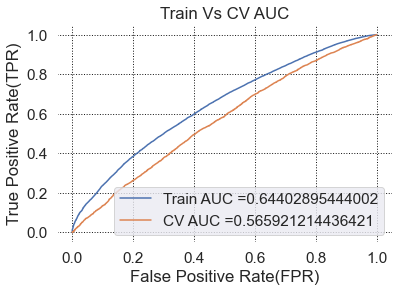

In [133]:
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
import math
import matplotlib.pyplot as plt
gbdt = lgb.LGBMClassifier(boosting_type='gbdt', class_weight='balanced', learning_rate=bestlearning_rate_1, n_estimators= bestn_estimators_1)
gbdt.fit(X_train_ohe,y_train)
    
y_train_pred_1 = gbdt.predict_proba(X_train_ohe)[:,1]
predictions_train_set1=gbdt.predict(X_train_ohe)

y_cv_pred_1 =gbdt.predict_proba(X_cv_ohe)[:,1]
predictions_train_set1=gbdt.predict(X_cv_ohe)


#y_te_pred_1 =gbdt.predict_proba(X_test_ohe)[:,1]
#predictions_train_set1=gbdt.predict(X_test_ohe)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_1)
cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv, y_cv_pred_1)
ax = plt.subplot()

auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_cv=auc(cv_fpr, cv_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train Vs CV AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

    

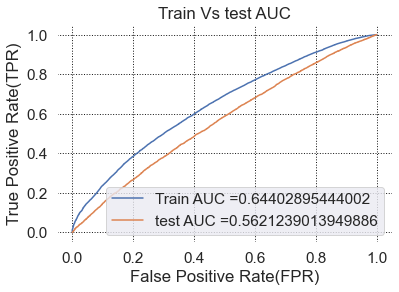

In [154]:
gbdt = lgb.LGBMClassifier(boosting_type='gbdt', class_weight='balanced', learning_rate=bestlearning_rate_1, n_estimators= bestn_estimators_1)
gbdt.fit(X_train_ohe,y_train)
    
y_train_pred_1 = gbdt.predict_proba(X_train_ohe)[:,1]
predictions_train_set1=gbdt.predict(X_train_ohe)

#y_cv_pred_1 =gbdt.predict_proba(X_cv_ohe)[:,1]
#predictions_train_set1=gbdt.predict(X_cv_ohe)


y_test_pred_1 =gbdt.predict_proba(X_test_ohe)[:,1]
predictions_train_set1=gbdt.predict(X_test_ohe)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_1)
ax = plt.subplot()

auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_cv=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train Vs test AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


In [91]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict_1(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
#     print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

In [139]:
import numpy as np
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_1(y_train_pred_1, tr_thresholds, train_fpr, train_tpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_1(y_test_pred_1, te_thresholds, test_fpr, test_tpr)))
print("="*100)
print("cv confusion matrix")
print(confusion_matrix(y_cv, predict_1(y_cv_pred_1, cv_thresholds, cv_fpr, cv_tpr)))





Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3602171375221418 for threshold 0.497
[[ 5013  3092]
 [18970 26456]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29518191556972195 for threshold 0.496
[[ 2583  2380]
 [12038 15774]]
cv confusion matrix
the maximum value of tpr*(1-fpr) 0.2999453275197395 for threshold 0.507
[[ 1999  1475]
 [ 9320 10148]]


In [158]:
import numpy as np
from sklearn.metrics import f1_score
y_train_pred_1 = gbdt.predict(X_train_ohe)
y_test_pred_1 = gbdt.predict(X_test_ohe)
y_cv_pred_1 = gbdt.predict(X_cv_ohe)

print('Train f1 score',f1_score(y_train,y_train_pred_1))
print('Test f1 score',f1_score(y_test,y_test_pred_1))
print('cv f1 score',f1_score(y_cv,y_cv_pred_1))

Train f1 score 0.6930214340703125
Test f1 score 0.6707871617147146
cv f1 score 0.676752142117322


In [159]:
from sklearn.metrics import accuracy_score
print('Train accuracy_score',accuracy_score(y_train,y_train_pred_1))
print('Test accuracy_score',accuracy_score(y_test,y_test_pred_1))
print('cv accuracy_score',accuracy_score(y_cv,y_cv_pred_1))

Train accuracy_score 0.5754049055687359
Test accuracy_score 0.5449580472921434
cv accuracy_score 0.5510853456542586


In [206]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_clf_s1 = XGBClassifier(eval_metric='mlogloss')

params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators':[5, 10, 50, 75, 100, 200]}

grid_search_s2 = GridSearchCV(xgb_clf_s1, params, cv=3, scoring='roc_auc', return_train_score=True)

grid_search_s2.fit(X_train_TFIDF, y_train)

train_auc= grid_search_s2.cv_results_['mean_train_score']
train_auc_std= grid_search_s2.cv_results_['std_train_score']
cv_auc = grid_search_s2.cv_results_['mean_test_score']
cv_auc_std= grid_search_s2.cv_results_['std_test_score']
bestlearning_rate_2=grid_search_s2.best_params_['learning_rate']
bestn_estimators_2=grid_search_s2.best_params_['n_estimators']
bestScore_2=grid_search_s2.best_score_

C:\Users\ASHOK\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASHOK\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASHOK\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab

In [207]:
results = pd.DataFrame.from_dict(grid_search_s2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.125661,0.017351,0.017427,0.001719,0.0001,5,"{'learning_rate': 0.0001, 'n_estimators': 5}",0.554876,0.541664,0.543641,0.546727,0.005819,36,0.556407,0.559596,0.558096,0.558033,0.001303
1,0.196624,0.018160,0.017447,0.004894,0.0001,10,"{'learning_rate': 0.0001, 'n_estimators': 10}",0.554876,0.541664,0.543641,0.546727,0.005818,35,0.556407,0.559596,0.558095,0.558033,0.001303
2,0.868046,0.024892,0.032798,0.003706,0.0001,50,"{'learning_rate': 0.0001, 'n_estimators': 50}",0.554777,0.542648,0.543641,0.547022,0.005498,33,0.556544,0.563763,0.558095,0.559467,0.003103
3,1.434849,0.084247,0.049634,0.000893,0.0001,75,"{'learning_rate': 0.0001, 'n_estimators': 75}",0.554968,0.542634,0.543641,0.547081,0.005592,31,0.557439,0.563771,0.558095,0.559768,0.002843
4,1.713758,0.043822,0.051124,0.002823,0.0001,100,"{'learning_rate': 0.0001, 'n_estimators': 100}",0.554984,0.542634,0.543641,0.547086,0.005600,30,0.557635,0.563771,0.558095,0.559834,0.002791
5,3.483692,0.156231,0.090393,0.003499,0.0001,200,"{'learning_rate': 0.0001, 'n_estimators': 200}",0.555491,0.542614,0.543641,0.547249,0.005843,29,0.559212,0.563783,0.558095,0.560363,0.002461
6,0.115626,0.008018,0.021341,0.003263,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.554776,0.542589,0.543641,0.547002,0.005514,34,0.556544,0.563795,0.558095,0.559478,0.003118
7,0.199262,0.006430,0.023363,0.001498,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.554975,0.542588,0.543641,0.547068,0.005608,32,0.557593,0.563795,0.558095,0.559827,0.002813
8,0.868264,0.040518,0.038164,0.003831,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.555577,0.544725,0.547508,0.549270,0.004602,28,0.559585,0.565846,0.561547,0.562326,0.002615
9,1.341538,0.119430,0.045411,0.005823,0.001,75,"{'learning_rate': 0.001, 'n_estimators': 75}",0.555499,0.544913,0.551366,0.550593,0.004356,24,0.559631,0.566316,0.565340,0.563763,0.002948


In [203]:
rf_random = RandomizedSearchCV(clf, class_weight='balanced', learning_rate=bestlearning_rate_2, n_estimators= bestn_estimators_2)
clf.fit(X_train_TFIDF,y_train)
    
y_train_pred_2 = gbdt.predict_proba(X_train_TFIDF)[:,1]
predictions_train_set2=gbdt.predict(X_train_TFIDF)

y_cv_pred_2 =gbdt.predict_proba(X_cv_TFIDF)[:,1]
predictions_cv_set2=gbdt.predict(X_cv_TFIDF)


#y_te_pred_1 =gbdt.predict_proba(X_test_ohe)[:,1]
#predictions_train_set1=gbdt.predict(X_test_ohe)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_1)
cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv, y_cv_pred_1)
ax = plt.subplot()

auc_set2_train=auc(train_fpr, train_tpr)
auc_set2_cv=auc(cv_fpr, cv_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train Vs CV AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()



TypeError: __init__() got an unexpected keyword argument 'class_weight'

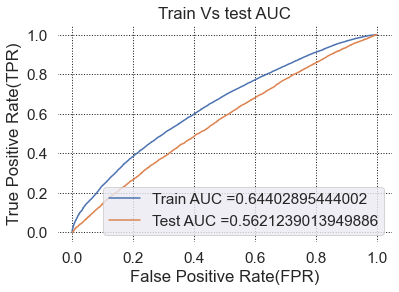

In [147]:
gbdt = lgb.LGBMClassifier(boosting_type='gbdt', class_weight='balanced', learning_rate=bestlearning_rate_2, n_estimators= bestn_estimators_2)
gbdt.fit(X_train_TFIDF,y_train)
    
y_train_pred_2 = gbdt.predict_proba(X_train_TFIDF)[:,1]
predictions_train_set2=gbdt.predict(X_train_TFIDF)

y_test_pred_2 =gbdt.predict_proba(X_test_TFIDF)[:,1]
predictions_test_set2=gbdt.predict(X_test_TFIDF)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_1)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred_1)
ax = plt.subplot()

auc_set2_train=auc(train_fpr, train_tpr)
auc_set2_test=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train Vs test AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


In [124]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict_2(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
#     print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

In [148]:
import numpy as np
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_2(y_train_pred_2, tr_thresholds, train_fpr, train_tpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_2(y_test_pred_2, te_thresholds, test_fpr, test_tpr)))
print("="*100)
print("cv confusion matrix")
print(confusion_matrix(y_cv, predict_2(y_cv_pred_2, cv_thresholds, cv_fpr, cv_tpr)))



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3602171375221418 for threshold 0.497
[[ 5013  3092]
 [18970 26456]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29518191556972195 for threshold 0.496
[[ 2583  2380]
 [12038 15774]]
cv confusion matrix
the maximum value of tpr*(1-fpr) 0.2999453275197395 for threshold 0.507
[[ 1999  1475]
 [ 9320 10148]]


In [160]:
import numpy as np
from sklearn.metrics import f1_score
y_train_pred_2 = gbdt.predict(X_train_TFIDF)
y_test_pred_2 = gbdt.predict(X_test_TFIDF)
y_cv_pred_2 = gbdt.predict(X_cv_TFIDF)

print('Train f1 score',f1_score(y_train,y_train_pred_2))
print('Test f1 score',f1_score(y_test,y_test_pred_2))
print('cv f1 score',f1_score(y_cv,y_cv_pred_2))

Train f1 score 0.44830660981501597
Test f1 score 0.4516776750330251
cv f1 score 0.45237735849056604


In [161]:
from sklearn.metrics import accuracy_score
print('Train accuracy_score',accuracy_score(y_train,y_train_pred_2))
print('Test accuracy_score',accuracy_score(y_test,y_test_pred_2))
print('cv accuracy_score',accuracy_score(y_cv,y_cv_pred_2))

Train accuracy_score 0.3643122676579926
Test accuracy_score 0.3667734553775744
cv accuracy_score 0.36744834800802023


In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_tfidf = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
clf1 = GridSearchCV(dt_tfidf, parameters, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)

clf1.fit(X_train_Response, y_train)

train_auc= clf1.cv_results_['mean_train_score']
train_auc_std= clf1.cv_results_['std_train_score']
cv_auc = clf1.cv_results_['mean_test_score']
cv_auc_std= clf1.cv_results_['std_test_score']
bestMaxDepth_3=clf1.best_params_['max_depth']
bestMinSampleSplit_3=clf1.best_params_['min_samples_split']
bestScore_3=clf1.best_score_
print("BEST MAX DEPTH: ",clf1.best_params_['max_depth']," BEST SCORE: ",clf1.best_score_,"BEST MIN SAMPLE SPLIT: ",clf1.best_params_['min_samples_split']) #clf.best_estimator_.alpha

Fitting 3 folds for each of 16 candidates, totalling 48 fits
BEST MAX DEPTH:  5  BEST SCORE:  0.5882597690180796 BEST MIN SAMPLE SPLIT:  100


In [181]:
results = pd.DataFrame.from_dict(clf1.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.026338,0.002666,0.007216,0.000301,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.561693,0.558477,0.561676,0.560615,0.001512,8,0.561325,0.563471,0.562078,0.562292,0.000889
1,0.027022,0.002173,0.007186,0.000225,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.561693,0.558477,0.561676,0.560615,0.001512,8,0.561325,0.563471,0.562078,0.562292,0.000889
2,0.025231,0.001395,0.008188,0.001121,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.561693,0.558477,0.561676,0.560615,0.001512,8,0.561325,0.563471,0.562078,0.562292,0.000889
3,0.025511,0.001733,0.007268,0.000255,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.561693,0.558477,0.561676,0.560615,0.001512,8,0.561325,0.563471,0.562078,0.562292,0.000889
4,0.060868,0.001301,0.008221,0.000312,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.594919,0.583379,0.585738,0.588012,0.004978,4,0.597909,0.603841,0.598983,0.600244,0.002581
5,0.058718,0.000559,0.008393,0.000191,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.594919,0.583379,0.585738,0.588012,0.004978,3,0.597909,0.603841,0.598983,0.600244,0.002581
6,0.058159,0.002377,0.009947,0.002213,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.594919,0.583386,0.586475,0.588260,0.004875,1,0.597909,0.603805,0.598916,0.600210,0.002575
7,0.060331,0.002734,0.007892,0.000162,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.594526,0.583394,0.586836,0.588252,0.004654,2,0.597351,0.603790,0.598237,0.599793,0.002849
8,0.087793,0.002045,0.010579,0.002232,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.556114,0.547091,0.567854,0.557020,0.008501,13,0.660200,0.664358,0.657355,0.660637,0.002876
9,0.095484,0.008446,0.009579,0.000423,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.555603,0.547539,0.567919,0.557020,0.008380,12,0.658176,0.662939,0.655505,0.658873,0.003075


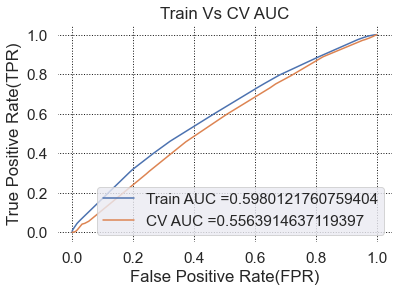

In [187]:
from sklearn.metrics import roc_curve, auc

dt_tfidf_testModel = DecisionTreeClassifier(class_weight='balanced',min_samples_split=bestMinSampleSplit_1,max_depth=bestMaxDepth_1)
dt_tfidf_testModel.fit(X_train_Response, y_train)

y_train_pred_3=dt_tfidf_testModel.predict_proba(X_train_Response)[:,1]
predictions_train_set1=dt_tfidf_testModel.predict(X_train_Response)

y_cv_pred_3=dt_tfidf_testModel.predict_proba(X_cv_Response)[:,1]
predictions_cv_set1=dt_tfidf_testModel.predict(X_cv_Response)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_3)
cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_cv, y_cv_pred_3)

ax = plt.subplot()

auc_set3_train=auc(train_fpr, train_tpr)
auc_set3_cv=auc(cv_fpr, cv_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(cv_fpr, cv_tpr, label="CV AUC ="+str(auc(cv_fpr, cv_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train Vs CV AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

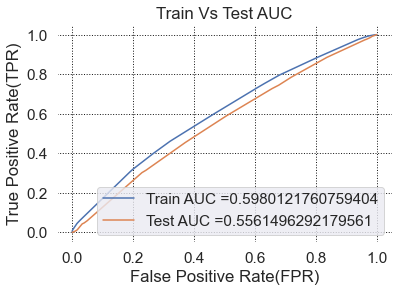

In [185]:
dt_tfidf_testModel = DecisionTreeClassifier(class_weight='balanced',min_samples_split=bestMinSampleSplit_1,max_depth=bestMaxDepth_1)
dt_tfidf_testModel.fit(X_train_Response, y_train)

y_train_pred_3=dt_tfidf_testModel.predict_proba(X_train_Response)[:,1]
predictions_train_set1=dt_tfidf_testModel.predict(X_train_Response)

y_test_pred_3=dt_tfidf_testModel.predict_proba(X_test_Response)[:,1]
predictions_test_set1=dt_tfidf_testModel.predict(X_test_Response)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_3)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_3)

ax = plt.subplot()

auc_set3_train=auc(train_fpr, train_tpr)
auc_set3_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train Vs Test AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [188]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict_3(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
#     print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

In [189]:
import numpy as np
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_3(y_train_pred_3, tr_thresholds, train_fpr, train_tpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_3(y_test_pred_3, te_thresholds, test_fpr, test_tpr)))
print("="*100)
print("cv confusion matrix")
print(confusion_matrix(y_cv, predict_3(y_cv_pred_3, cv_thresholds, cv_fpr, cv_tpr)))



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3203716721269371 for threshold 0.49
[[ 4345  3760]
 [18279 27147]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2907554085186514 for threshold 0.49
[[ 2447  2516]
 [11411 16401]]
cv confusion matrix
the maximum value of tpr*(1-fpr) 0.2940017948944515 for threshold 0.49
[[ 1710  1764]
 [ 7840 11628]]


In [191]:
import numpy as np
from sklearn.metrics import f1_score
y_train_pred_3 = dt_tfidf_testModel.predict(X_train_Response)
y_test_pred_3 = dt_tfidf_testModel.predict(X_test_Response)
y_cv_pred_3 = dt_tfidf_testModel.predict(X_cv_Response)

print('Train f1 score',f1_score(y_train,y_train_pred_3))
print('Test f1 score',f1_score(y_test,y_test_pred_3))
print('cv f1 score',f1_score(y_cv,y_cv_pred_3))

Train f1 score 0.6071423393118648
Test f1 score 0.5980097856146737
cv f1 score 0.6006671833406342


In [192]:
from sklearn.metrics import accuracy_score
print('Train accuracy_score',accuracy_score(y_train,y_train_pred_3))
print('Test accuracy_score',accuracy_score(y_test,y_test_pred_3))
print('cv accuracy_score',accuracy_score(y_cv,y_cv_pred_3))

Train accuracy_score 0.49384468812463805
Test accuracy_score 0.48109839816933636
cv accuracy_score 0.48343649202336325


# Summary

In [196]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "learning_rate","n_estimators", "Train AUC", "Test AUC","CV AUC","BestScore"]
# auc_set2_train=auc(train_fpr, train_tpr)
# auc_set2_test=auc(test_fpr, test_tpr)

x.add_row(["BOW", "GBDT", bestlearning_rate_1,bestn_estimators_1,auc_set1_train,auc_set1_test,auc_set1_cv,bestScore_1])
x.add_row(["TF-IDF", "GBDT", bestlearning_rate_2,bestn_estimators_2,auc_set2_train,auc_set2_test,auc_set1_cv,bestScore_2])
x.add_row(["Response", "DT", bestMaxDepth_3,bestMinSampleSplit_3,auc_set2_train,auc_set2_test,auc_set1_cv,bestScore_2])

In [197]:
print(x)

+------------+-------+---------------+--------------+------------------+--------------------+--------------------+--------------------+
| Vectorizer | Model | learning_rate | n_estimators |    Train AUC     |      Test AUC      |       CV AUC       |     BestScore      |
+------------+-------+---------------+--------------+------------------+--------------------+--------------------+--------------------+
|    BOW     |  GBDT |      0.1      |      75      | 0.64402895444002 | 0.5105836440051896 | 0.5621239013949886 | 0.5882597690180796 |
|   TF-IDF   |  GBDT |      0.1      |      75      | 0.64402895444002 | 0.5621239013949886 | 0.5621239013949886 | 0.5683399420571243 |
|  Response  |   DT  |       5       |     100      | 0.64402895444002 | 0.5621239013949886 | 0.5621239013949886 | 0.5683399420571243 |
+------------+-------+---------------+--------------+------------------+--------------------+--------------------+--------------------+
